In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

paragraph = "I really love books—they’re my favorite way to escape and explore new ideas. My go-to genres are fantasy romance, dark romance, and sci-fi, especially when they have deep, thought-provoking themes. I enjoy stories that stay with me and make me think. Lately, I’ve also been curious about classical literature and want to give it a try."

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

cleaned_text = clean_text(paragraph)

sentences = sent_tokenize(paragraph)
words_nltk = word_tokenize(paragraph)
words_python = paragraph.split()

stop_words = set(stopwords.words('english'))
words_no_stopwords = [word for word in words_nltk if word.lower() not in stop_words]


cleaned_words = [word.lower() for word in words_no_stopwords if word.isalpha()]
word_freq = Counter(cleaned_words)

for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


romance: 2
really: 1
love: 1
favorite: 1
way: 1
escape: 1
explore: 1
new: 1
ideas: 1
genres: 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

words_no_stop = [word for word in alphabetic_words if word.lower() not in stop_words]

ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in words_no_stop]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stop]

for original, stemmed, lemmatized in zip(words_no_stop[:8], stemmed_words[:8], lemmatized_words[:8]):
    print(f"Original: {original:<15} | Stemmed: {stemmed:<15} | Lemmatized: {lemmatized:<15}")


Original: really          | Stemmed: realli          | Lemmatized: really         
Original: love            | Stemmed: love            | Lemmatized: love           
Original: books           | Stemmed: book            | Lemmatized: book           
Original: favorite        | Stemmed: favorit         | Lemmatized: favorite       
Original: way             | Stemmed: way             | Lemmatized: way            
Original: escape          | Stemmed: escap           | Lemmatized: escape         
Original: explore         | Stemmed: explor          | Lemmatized: explore        
Original: new             | Stemmed: new             | Lemmatized: new            


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Apple announces new iPhone model with improved camera and performance.",
    "The new Samsung Galaxy phone features a stunning display and long battery life.",
    "Tesla's new electric car promises faster charging and enhanced safety features."
]

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(texts)

print("Bag of Words Representation:")
print(X_bow.toarray())
print("\n")

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts)

print("TF-IDF Representation:")
print(X_tfidf.toarray())
print("\n")

for i, text in enumerate(texts):
    print(f"Top 3 keywords for Text {i+1}: '{text}'")
    sorted_indices = X_tfidf[i].toarray().flatten().argsort()[::-1]
    top_3_keywords = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in sorted_indices[:3]]
    print("Top 3 Keywords:", top_3_keywords)
    print("\n")


Bag of Words Representation:
[[1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0]
 [1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]]


TF-IDF Representation:
[[0.20026461 0.33907746 0.33907746 0.         0.33907746 0.
  0.         0.         0.         0.         0.         0.
  0.         0.33907746 0.33907746 0.         0.         0.33907746
  0.20026461 0.33907746 0.         0.         0.         0.
  0.         0.         0.         0.33907746]
 [0.18424347 0.         0.         0.3119513  0.         0.
  0.         0.3119513  0.         0.         0.         0.23724701
  0.3119513  0.         0.         0.3119513  0.3119513  0.
  0.18424347 0.         0.3119513  0.         0.         0.3119513
  0.3119513  0.         0.3119513  0.        ]
 [0.19392047 0.         0.         0.         0.         0.32833589
  0.32833589 0.         0.32833589 0.32833589 0.32833589 0.24970791
  0.         0.         0.         

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import string

text1 = "Artificial Intelligence (AI) is the simulation of human intelligence processes by machines. It involves learning, reasoning, and problem-solving to automate tasks and enhance decision-making."
text2 = "Blockchain is a decentralized digital ledger that records transactions across many computers. It ensures data security, transparency, and immutability, making it ideal for cryptocurrencies."

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

set1 = set(tokens1)
set2 = set(tokens2)

jaccard_sim = jaccard_similarity(set1, set2)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print(f"Jaccard Similarity: {jaccard_sim}")
print(f"Cosine Similarity: {cosine_sim}")

if jaccard_sim > cosine_sim:
    print("\nJaccard Similarity seems to provide better insights, as it focuses on the overlap of unique words between the two texts.")
else:
    print("\nCosine Similarity seems to provide better insights, as it considers the importance of word frequency and context.")


Jaccard Similarity: 0.07142857142857142
Cosine Similarity: 0.12701941110668097

Cosine Similarity seems to provide better insights, as it considers the importance of word frequency and context.


Review: I recently purchased the Samsung Galaxy S21, and I'm absolutely impressed with its performance. The display is stunning, offering vibrant colors and sharp details, perfect for media consumption. The camera quality is top-notch, especially the night mode feature, which captures incredible details in low light. The performance is smooth, with no lag, even when running multiple apps. Battery life is solid, lasting me throughout the day with moderate usage. Overall, the Galaxy S21 is a premium smartphone that lives up to its reputation and is worth the investment.
TextBlob Polarity: 0.30787037037037046, Subjectivity: 0.5351851851851852
Sentiment Classification: Positive
--------------------------------------------------


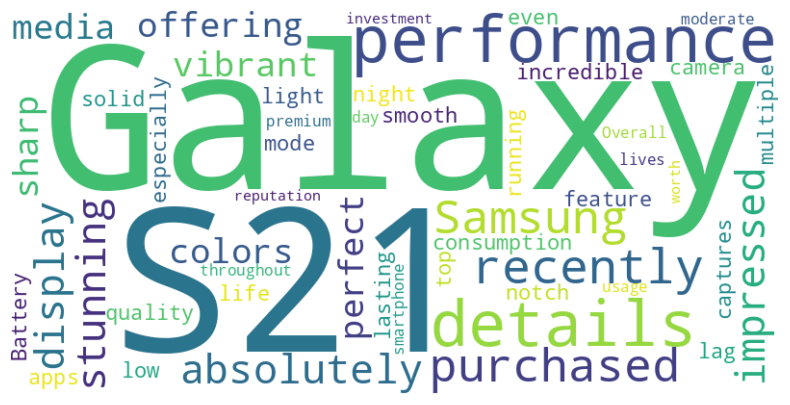

In [12]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "I recently purchased the Samsung Galaxy S21, and I'm absolutely impressed with its performance. The display is stunning, offering vibrant colors and sharp details, perfect for media consumption. The camera quality is top-notch, especially the night mode feature, which captures incredible details in low light. The performance is smooth, with no lag, even when running multiple apps. Battery life is solid, lasting me throughout the day with moderate usage. Overall, the Galaxy S21 is a premium smartphone that lives up to its reputation and is worth the investment."

blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

if polarity > 0:
    sentiment_label = 'Positive'
    positive_reviews_text = review
elif polarity < 0:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Neutral'

print(f"Review: {review}")
print(f"TextBlob Polarity: {polarity}, Subjectivity: {subjectivity}")
print(f"Sentiment Classification: {sentiment_label}")
print("-" * 50)

if sentiment_label == 'Positive':
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [18]:
!pip install tensorflow

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [21]:
paragraph = """
Flowers are one of nature's most enchanting creations. Their vibrant colors, unique shapes, and delightful fragrances captivate the hearts of many. Flowers bloom in all seasons, adding beauty and charm to gardens, streets, and homes. They symbolize various emotions, from love and happiness to sympathy and remembrance. Many cultures around the world use flowers for celebrations, ceremonies, and healing purposes. Bees and butterflies are often attracted to flowers, playing a key role in pollination. Whether as a gift or a decoration, flowers bring joy to all who see them.
"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1
input_sequences = []

for line in paragraph.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100)

def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')

        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)

        output_word = tokenizer.index_word.get(predicted_word_index[0], '')

        seed_text += " " + output_word

    return seed_text

seed_word = "Flowers"
new_text = generate_text(seed_word, 30, model, max_sequence_length)
print(new_text)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.0061 - loss: 4.2352    
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0661 - loss: 4.2200
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0700 - loss: 4.2048
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0857 - loss: 4.1770
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0817 - loss: 4.1219
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0817 - loss: 4.0336
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0778 - loss: 4.0086 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0896 - loss: 3.9850
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0778 - loss: 3.9598
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1074 - loss: 3.8898
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0644 - loss: 3.8357
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1330